## Import library
**pandas** - used to perform data manipulation and analysis<br>
**numpy** - used to perform a wide variety of mathematical operations on array<br>
**matplotlib** - used for data visualization and graphical plotting<br>
**seaborn** - built on top of matplotlib with similar functionalities<br>
**re** – used as a regular expression to find particular patterns and process it<br>
**nltk** –  a natural language processing toolkit module<br>
**warnings** - to manipulate warnings details<br>
**%matplotlib inline** - to enable the inline plotting

In [6]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
import re
import string

## Load Dataset
- Fake.csv
- True.csv

In [6]:
# Load dataset
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

In [7]:
# See Columns fake news
print("Fake News Columns:", fake_news.columns)

Fake News Columns: Index(['title', 'text', 'subject', 'date'], dtype='object')


In [8]:
# See Columns Real news
print("Real News Columns:", real_news.columns)

Real News Columns: Index(['title', 'text', 'subject', 'date'], dtype='object')


In [9]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**Missing Value Check:** Identify and remove any rows with missing values.

In [13]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
real_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Data preprocessing

In [15]:
fake_news.shape

(23481, 4)

In [16]:
real_news.shape

(21417, 4)

In [17]:
# add Label: 0 for Real, 1 for Fake
real_news['label'] = 0
fake_news['label'] = 1

In [18]:
# Append both dataset into single dataset
combined_data = pd.concat([real_news, fake_news], ignore_index=True)

In [19]:
# The head() function in pandas retrieves the top n rows of a DataFrame, where n is an optional argument defaulting to 5 if not provided.
combined_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [20]:
# the tail() function in pandas fetches the bottom n rows of a DataFrame, where n is also optional and defaults to 5 if not specified.
combined_data.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [21]:
print(combined_data.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [22]:
print(combined_data.shape)

(44898, 5)


In [25]:
New_combined_data = combined_data.drop(["title", "subject","date"], axis = 1)

In [26]:
New_combined_data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [27]:
New_combined_data.tail()

,text,label
44893,21st Century Wire says As 21WIRE reported earl...,1
44894,21st Century Wire says It s a familiar theme. ...,1
44895,Patrick Henningsen 21st Century WireRemember ...,1
44896,21st Century Wire says Al Jazeera America will...,1
44897,21st Century Wire says As 21WIRE predicted in ...,1


In [28]:
# Balanced or Unbalanced dataset
New_combined_data['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

### Shuffle or Resample

In [29]:
New_combined_data = New_combined_data.sample(frac = 1)

In [30]:
New_combined_data.head()

,text,label
25269,Let s get something straight here Americans ...,1
8008,WASHINGTON (Reuters) - Republican Party presid...,0
37981,Thank goodness for organizations like citizens...,1
1904,CINCINNATI (Reuters) - Democrat Richard Cordra...,0
36018,"He s a controversial, conservative artist and ...",1


In [31]:
New_combined_data.reset_index(inplace = True)

In [32]:
New_combined_data.head()

,index,text,label
0,25269,Let s get something straight here Americans ...,1
1,8008,WASHINGTON (Reuters) - Republican Party presid...,0
2,37981,Thank goodness for organizations like citizens...,1
3,1904,CINCINNATI (Reuters) - Democrat Richard Cordra...,0
4,36018,"He s a controversial, conservative artist and ...",1


In [33]:
New_combined_data.drop(["index"],axis = 1, inplace = True)

In [34]:
New_combined_data.head()

,text,label
0,Let s get something straight here Americans ...,1
1,WASHINGTON (Reuters) - Republican Party presid...,0
2,Thank goodness for organizations like citizens...,1
3,CINCINNATI (Reuters) - Democrat Richard Cordra...,0
4,"He s a controversial, conservative artist and ...",1


## Feature Extraction

In [146]:
def wordopt(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d', '', text)  # Remove numbers
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    return text

In [147]:
New_combined_data['text'] = New_combined_data['text'].apply(wordopt)

In [148]:
New_combined_data['text']

0        let s get something straight here   americans ...
1        washington reuters  republican party president...
2        thank goodness for organizations like citizens...
3        cincinnati reuters  democrat richard cordray d...
4        he s a controversial conservative artist and h...
                               ...                        
44893    brussels reuters  nato s pledge to send more t...
44894    orenburg russia reuters  when vladimir kabunin...
44895    brussels reuters  the european union is set to...
44896                                                     
44897    kabul reuters  us and afghan forces have launc...
Name: text, Length: 44898, dtype: object

In [149]:
x = New_combined_data['text']
y = New_combined_data['label']

In [150]:
x

0        let s get something straight here   americans ...
1        washington reuters  republican party president...
2        thank goodness for organizations like citizens...
3        cincinnati reuters  democrat richard cordray d...
4        he s a controversial conservative artist and h...
                               ...                        
44893    brussels reuters  nato s pledge to send more t...
44894    orenburg russia reuters  when vladimir kabunin...
44895    brussels reuters  the european union is set to...
44896                                                     
44897    kabul reuters  us and afghan forces have launc...
Name: text, Length: 44898, dtype: object

In [151]:
y

0        1
1        0
2        1
3        0
4        1
        ..
44893    0
44894    0
44895    0
44896    1
44897    0
Name: label, Length: 44898, dtype: int64

## Split data into training and testing

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [153]:
x_train.shape

(31428,)

In [154]:
x_test.shape

(13470,)

## Model training, Evaluation, and Prediction


In [155]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already loaded the dataset and split the data into X_train, X_test, y_train, y_test
# Initialize TF-IDF Vectorizer and fit to the training data
vectorization = TfidfVectorizer(max_df=0.7, stop_words='english')
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Initialize the Passive-Aggressive Classifier
PA = PassiveAggressiveClassifier(max_iter=100)
PA.fit(xv_train, y_train)

# Test the model
print(f"Training accuracy: {accuracy_score(y_train, PA.predict(xv_train))}")
print(f"Test accuracy: {accuracy_score(y_test, PA.predict(xv_test))}")

Training accuracy: 1.0
Test accuracy: 0.9951002227171493


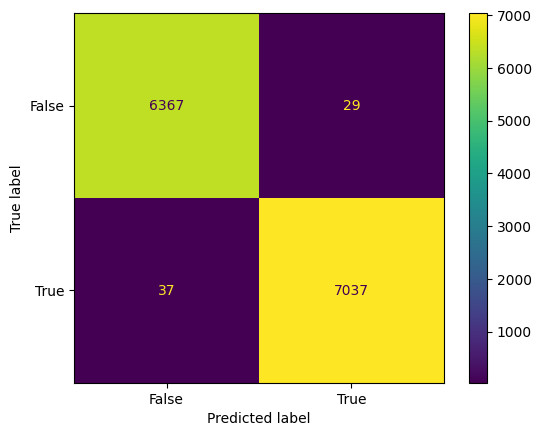

In [156]:
# Confusion matrix of Results from PA
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, PA.predict(xv_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [157]:
# Prediction function
def output_label(n):
    return "It is a Fake News" if n == 1 else "It is a Genuine/Real News"

def manual_testing(news):
    # Create a DataFrame with the news text
    new_test = pd.DataFrame({"text": [news]})
    
    # Process the text using the wordopt function if needed
    new_test["text"] = new_test["text"].apply(wordopt)  # Assuming wordopt is a text preprocessing function
    
    # Transform the text to the required vectorized format
    new_xv_test = vectorization.transform(new_test["text"])
    
    # Predict using the Passive-Aggressive (PA) model
    prediction = PA.predict(new_xv_test)
    
    # Return the label for the prediction
    return output_label(prediction[0])

In [170]:

# Example usage
news_article = input("Enter a news article to classify: ")

Enter a news article to classify:  India to focus on climate finance, accountability, protection for vulnerable communities at COP29 India’s COP29 strategy emphasises climate finance, accountability, and protection for vulnerable communities, urging developed nations to fulfill climate pledges


In [171]:
print(manual_testing(news_article))

It is a Genuine/Real News


In [172]:
# save file
import pickle
filename = 'model.pkl'
pickle.dump(PA, open(filename, 'wb'))

In [173]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorization, f)